# GRIP : The Sparks Foundation

### Data Science and Business Analytics Intern

### Author : Maroof Jahid Momin

### Task 1 : Prediction Using Supervised ML

 __In this task we will predict the percentage of a student based upon the number of thier study hours.The task has two variables such as Hours and Scores,where the dependent feature is the No of hours student has been studied and the Target Column is Percentage scores.This problem can be solved by using Simple Linear Regression.__

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

### _Importing DataSet by url_

In [2]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.shape

(25, 2)

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


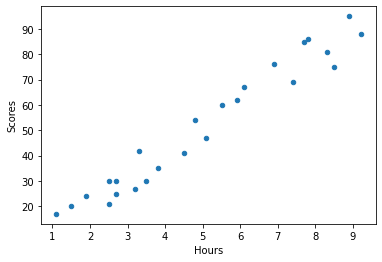

In [7]:
df.plot(kind="scatter",x="Hours",y="Scores")
plt.show()

### _Correlation matrix_

In [8]:
df.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
df.corr(method="spearman")

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [10]:
hours=df['Hours']
scores=df['Scores']

<AxesSubplot:xlabel='Hours', ylabel='Density'>

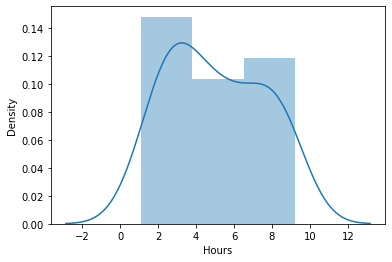

In [11]:
sns.distplot(hours)

<AxesSubplot:xlabel='Scores', ylabel='Density'>

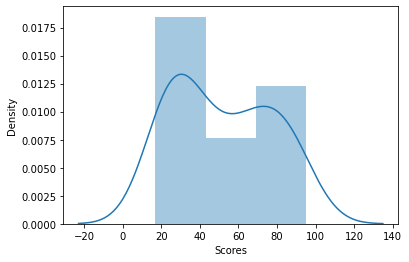

In [12]:
sns.distplot(scores)

### _Linear Regression_

To seperate X and Y

In [13]:
x=df.iloc[:,:-1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [14]:
y=df.iloc[:,1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### _Train_Test_split_

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain, ytrain)
ypred=lr.predict(xtest)

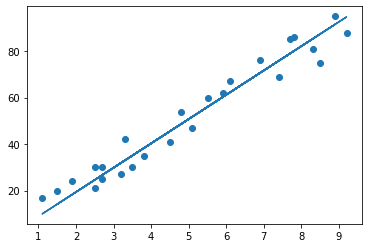

In [18]:
m=lr.coef_
c=lr.intercept_
sline=m*x+c
plt.scatter(x,y)
plt.plot(x,sline)
plt.show()

### _Comparing Actual VS Predicted_

In [19]:
actual_predicted=pd.DataFrame({"Target":ytest,"Predicted":ypred})
actual_predicted

,Target,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


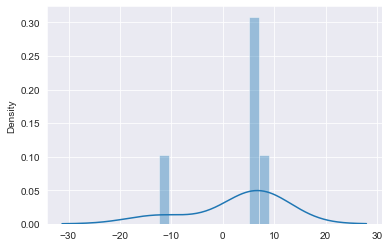

In [20]:
sns.set_style("darkgrid")
sns.distplot(np.array(ytest-ypred))
plt.show()

__What would be the predicted score if a student studies for 9.25 hours per day?__

In [21]:
h=9.25
s=lr.predict([[h]])
print("if a student studies for {} hours per day he will score {} % in exam.".format(h,s))

if a student studies for 9.25 hours per day he will score [95.22829438] % in exam.


### _Model Evaluation_

In [22]:
from sklearn.metrics import r2_score,mean_absolute_error
print('mean absolute error:',mean_absolute_error(ytest,ypred))
print("r2 score:",r2_score(ytest,ypred))

mean absolute error: 7.882398086270432
r2 score: 0.8421031525243527
